# **Hierarchical Clustering - Agglomerative**<a name="Introduction"></a>
Hierarchical clustering algorithms build a hierarchy of clusters where each node is a cluster consisting of the clusters of its daughter nodes. Strategies for hierarchical clustering generally fall into two types, divisive and agglomerative. Divisive is top down, so you start with all observations in a large cluster and break it down into smaller pieces Think about divisive as dividing the cluster. Agglomerative is the opposite of divisive. So it is bottom up, where each observation starts in its own cluster and pairs of clusters are merged together as they move up the hierarchy. Agglomeration means to amass or collect things, which is exactly what this does with the cluster. The agglomerative approach is more popular among data scientists. This method builds the hierarchy from the individual elements by progressively merging clusters.

Agglomerative algorithm proceeds by merging clusters, and we repeat it until all clusters are merged and the tree becomes completed. Hierarchical clustering is typically visualized as a dendrogram. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged. By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering. Essentially, hierarchical clustering does not require a prespecified number of clusters.



## **Table of Contents**


*  [Hierarchical Clustering - Agglomerative](#Introduction)

<ul>

  * [Hierarchical Clustering - Agglomerative  on a randomly generated dataset](#random)
  <ul>
  * [Generating Random Data](#Generate)
  * [Setting up Agglomerative Clustering](#SetUP)
  * [Dendrogram Associated for the Agglomerative Hierarchical Clustering](#Visual)
  </ul>
</ul>


* [Clustering on the Vehicle Dataset](#Clustering)

<ul>

  * [Dataset Information](#Dataset)
  * [Clustering using scipy](#scipy)
  * [Method Development: Setting up the Hierarchical Clustering model using skl](#Method)
  * [Cluster Visualization](#Visualize)
</ul>

<br><br>
**Import required library packages:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Hierarchical Clustering - Agglomerative  on a randomly generated dataset**<a name="random"></a>

Using the **make_blobs** class generate a random set of data.

## **Generating Random Data**<a name="Generate"></a>
<b><u>Input</u></b>

*   **n_samples:** The total number of points equally divided among clusters. Choose a number from 10-1500 for Hierarchical clustering, as it cannot handle large datasets well. 
<ul>
*   **Value will be:** 50
</ul>
*   **centers:** The number of centers to generate, or the fixed center locations. Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers
<ul>
*   **Value will be:** [[4,4], [-2, -3], [1, 1], [10,4]]
</ul>
*   **cluster_std:** The standard deviation of the clusters. The larger the number, the further apart the clusters. Choose a number between 0.5-1.5. 
<ul>
*   **Value will be:** 0.9
</ul>

**<u>Output</u>**

*   **X:** Array of shape [n_samples, n_features]. (Feature Matrix)
<ul>
*   The generated samples.
</ul>
*   **y:** Array of shape [n_samples]. (Response Vector)
<ul>
*   The integer labels for cluster membership of each sample.
</ul>

In [2]:
from sklearn.datasets import make_blobs 
X, y = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)
print(X[0:4])
print(y)

[[5.16991286 5.29690408]
 [8.10636687 3.59619217]
 [4.8052824  3.85652865]
 [2.08820857 0.06452124]]
[0 3 0 2 0 1 0 1 3 3 0 1 1 1 1 1 2 1 3 0 3 1 1 0 3 2 0 3 2 1 2 2 3 0 3 0 2
 3 2 2 2 2 1 3 1 0 3 0 2 0]


Plot the scatter plot of the randomly generated X data

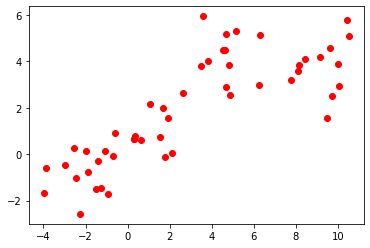

In [3]:
plt.scatter(X[:, 0], X[:, 1], marker='o', color='red'); 

### **Setting up Agglomerative Clustering**<a name="SetUP"></a>
**Setting up K-Means**<a name="SetUP"></a>
The Agglomerative Clustering class will require two inputs:

* **n_clusters:** The number of clusters to form as well as the number of centroids to generate. 
    <ul>
        <li> Value will be: 4 </li>
    </ul>
* **linkage:**  Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
    <ul>
    <li>Value will be: 'complete'</li> 
    <li>Note: It is recommended to try everything with 'average' as well</li>
    </ul>

<br>
Save the result to a variable called <b> agglom </b> and fit the model with X and y from the generated data above.

In [4]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom.fit(X,y)

AgglomerativeClustering(linkage='average', n_clusters=4)

Run the following code to show the clustering!

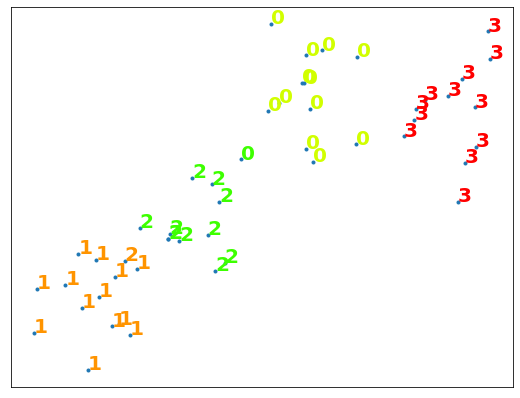

In [5]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(9,7))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X.
x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)

# Get the average distance for X.
X = (X - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X[i, 0], X[i, 1], str(y[i]),
             color=plt.cm.hsv(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 20})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X[:, 0], X[:, 1], marker='.')
# Display the plot
plt.show()

### **Dendrogram Associated for the Agglomerative Hierarchical Clustering**<a name="Visual"></a>

Remember that a **distance matrix** contains the **distance from each point to every other point of a dataset**. <br>
Use the function **distance_matrix**, which requires **two inputs**. Use the Feature Matrix, **X** as both inputs and save the distance matrix to a variable called **dist_matrix** <br> 
Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure that the matrix is correct. <br> (print out dist_matrix to make sure it's correct)

In [6]:
from scipy.spatial import distance_matrix 
dist_matrix = distance_matrix(X,X) 
print(dist_matrix.round(1))

[[0.  0.3 0.2 ... 0.1 0.6 0.2]
 [0.3 0.  0.2 ... 0.4 0.6 0.3]
 [0.2 0.2 0.  ... 0.3 0.5 0.1]
 ...
 [0.1 0.4 0.3 ... 0.  0.7 0.3]
 [0.6 0.6 0.5 ... 0.7 0.  0.4]
 [0.2 0.3 0.1 ... 0.3 0.4 0. ]]


A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. 
By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering. 

We can use different criteria to find the closest clusters and merge them. In general, it completely depends on the data type, dimensionality of data and most importantly, the domain knowledge of the data set.
In fact, different approaches to defining the distance between clusters distinguish the different algorithms. There are multiple ways to do this: 
<li>The first one is called single linkage clustering. Single linkage is defined as the shortest distance between two points in each cluster.</li>
<li>Next up is complete linkage clustering. This time we are finding the longest distance between the points in each cluster.</li>
<li>The third type of linkage is average linkage clustering or the mean distance. This means we're looking at the average distance of each point from one cluster to every point in another cluster.</li>
<li>The final linkage type to be reviewed is centroid linkage clustering. Centroid is the average of the feature sets of points in a cluster. This linkage takes into account the centroid of each cluster when determining the minimum distance.</li>

The following are methods for calculating the distance between the newly formed cluster u and each v.

<li><b>method='single' assigns</b></li>
    for all points i in cluster u and j in cluster v. This is also known as the Nearest Point Algorithm.

<li><b>method='complete' assigns</b></li>
    for all points i in cluster u and j in cluster v. This is also known by the Farthest Point Algorithm or Voor Hees Algorithm.

<li><b>method='average' assigns</b></li>
    for all points i and j where |u| and |v| are the cardinalities of clusters u and v, respectively. This is also called the UPGMA algorithm.

<li><b>method='weighted' assigns</b></li>
    where cluster u was formed with cluster s and t and v is a remaining cluster in the forest. (also called WPGMA)

<li><b>method='centroid' assigns</b></li>
    where c_s and c_t are the centroids of clusters s and t, respectively. When two clusters s and t are combined into a new cluster u, the new centroid is computed over all the original objects in clusters s and t. The distance then becomes the Euclidean distance between the centroid of u and the centroid of a remaining cluster v in the forest. This is also known as the UPGMC algorithm.
</br></br></br>
Using the **linkage**  class from hierarchy, pass in the parameters:
<ul>
    <li> The distance matrix </li>
    <li> 'complete' for complete linkage </li>
</ul> <br>
Save the result to a variable called <b> Z </b> <br><br>
Adter that, save the dendrogram to a variable called <b>dendro</b>. In doing this, the dendrogram will also be displayed.
Using the <b> dendrogram </b> class from hierarchy, pass in the parameter:
<b> Z </b>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


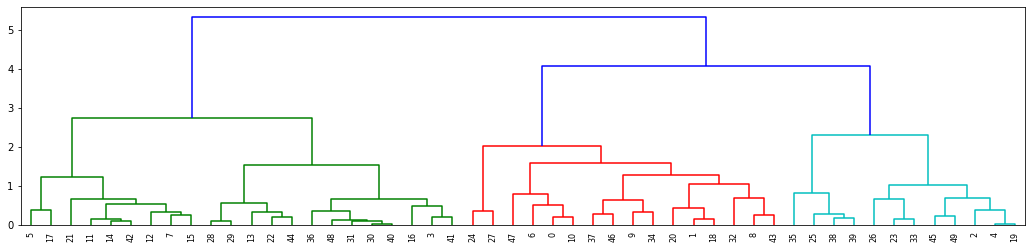

In [7]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(dist_matrix, 'complete')
plt.figure(figsize=(18, 4))
dendro = hierarchy.dendrogram(Z)

Change the linkage from __complete__ linkage  to __average__ linkage to see how the dendogram changes.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


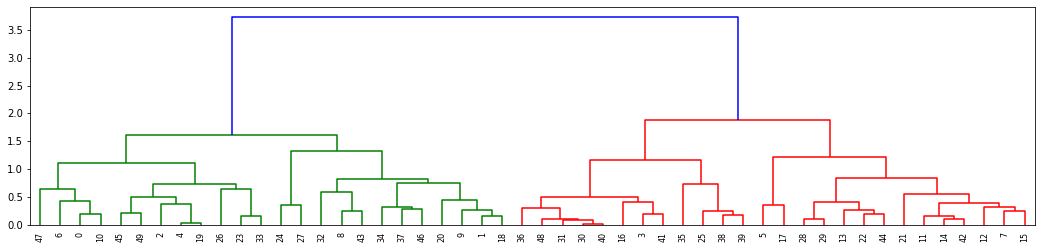

In [8]:
Zavg = hierarchy.linkage(dist_matrix, 'average')
plt.figure(figsize=(18, 4))
dendro = hierarchy.dendrogram(Zavg)

Change the linkage to __single__ linkage to see how the dendogram changes.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


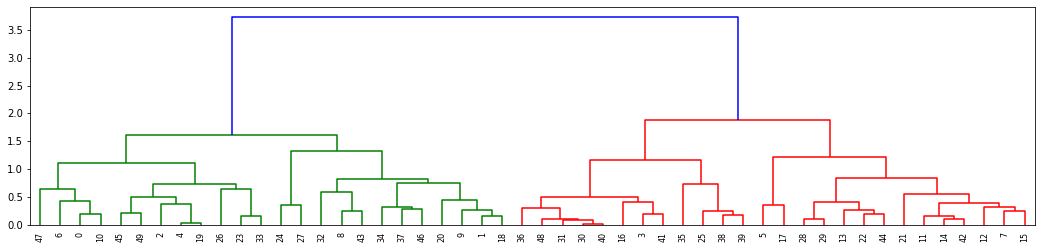

In [9]:
Zsingle = hierarchy.linkage(dist_matrix, 'single')
plt.figure(figsize=(18, 4))
dendro = hierarchy.dendrogram(Zavg);

Change the linkage to __centroid__ linkage to see how the dendogram changes.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


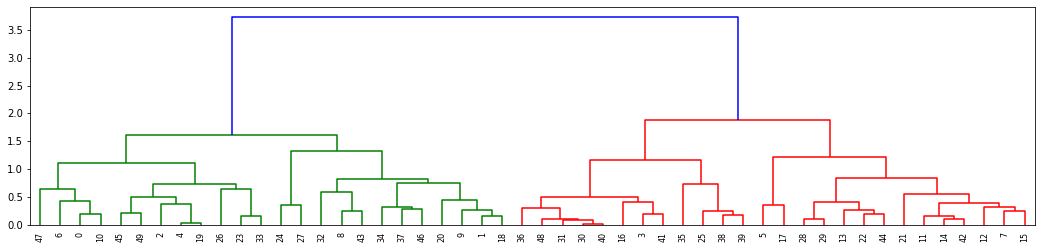

In [10]:
Zcentroid = hierarchy.linkage(dist_matrix, 'centroid')
plt.figure(figsize=(18, 4))
dendro = hierarchy.dendrogram(Zavg);

Change the linkage to __weighted__ linkage to see how the dendogram changes.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


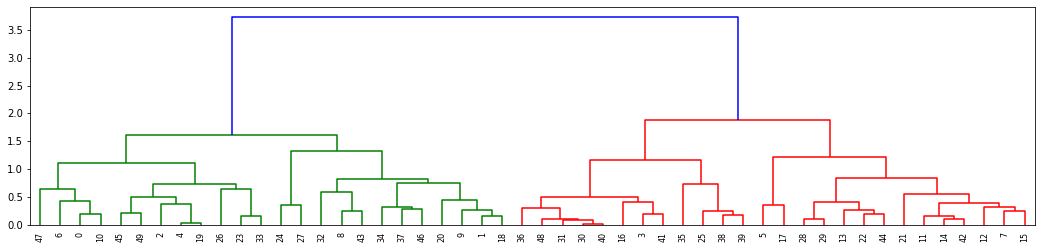

In [11]:
Zweighted = hierarchy.linkage(dist_matrix, 'weighted')
plt.figure(figsize=(18, 4))
dendro = hierarchy.dendrogram(Zavg);

## **Clustering on Vehicle dataset**<a name="Clustering"></a>

Imagine that an automobile manufacturer has developed prototypes for a new vehicle. Before introducing the new model into its range, the manufacturer wants to determine which existing vehicles on the market are most like the prototypes--that is, how vehicles can be grouped, which group is the most similar with the model, and therefore which models they will be competing against.

The objective here is to use clustering methods, to find the most distinctive clusters of vehicles. It will summarize the existing vehicles and help manufacturers to make decision about the supply of new models.

### **Data Set Information: Vehicle data**<a name="Dataset"></a>

The feature sets include  price in thousands (price), engine size (engine_s), horsepower (horsepow), wheelbase (wheelbas), width (width), length (length), curb weight (curb_wgt), fuel capacity (fuel_cap) and fuel efficiency (mpg).

#### **Download & Read the vehicle data**

In [12]:
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

--2022-04-21 18:19:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0s      

2022-04-21 18:19:41 (168 MB/s) - ‘cars_clus.csv’ saved [17774/17774]



In [13]:
df = pd.read_csv('cars_clus.csv')
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [14]:
print(df.size)
print(df.shape)
print(df.ndim)

2544
(159, 16)
2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB


#### **Data Cleaning**

In [16]:
df.isnull().sum()

manufact     2
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64

In [17]:
df.replace('$null$', np.NaN, inplace=True)

In [18]:
df.isnull().sum()

manufact      2
model         0
sales         2
resale       38
type          2
price         2
engine_s      1
horsepow      1
wheelbas      1
width         1
length        1
curb_wgt      2
fuel_cap      1
mpg           3
lnsales       2
partition     0
dtype: int64

In [19]:
df.describe()

,partition
count,159.000000
mean,0.012579
std,0.111799
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [20]:
print ("Shape of dataset before cleaning: ", df.size)
df = df.dropna()
df[['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']].astype('float32')
#df = df.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", df.size)
df.head()

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919001,16.360001,0.0,21.500000,1.8,140.0,101.199997,67.300003,172.399994,2.639,13.200000,28.0,2.828,0.0
1,Acura,TL,39.383999,19.875000,0.0,28.400000,3.2,225.0,108.099998,70.300003,192.899994,3.517,17.200001,25.0,3.673,0.0
3,Acura,RL,8.588000,29.725000,0.0,42.000000,3.5,210.0,114.599998,71.400002,196.600006,3.850,18.000000,22.0,2.150,0.0
4,Audi,A4,20.396999,22.254999,0.0,23.990000,1.8,150.0,102.599998,68.199997,178.000000,2.998,16.400000,27.0,3.015,0.0
5,Audi,A6,18.780001,23.555000,0.0,33.950001,2.8,200.0,108.699997,76.099998,192.000000,3.561,18.500000,22.0,2.933,0.0


In [21]:
df.describe()

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0
mean,59.112331,18.031540,0.247863,25.969488,3.048717,181.282059,107.326515,71.189735,187.718018,3.324051,17.812819,24.117949,3.401180,0.0
std,75.058929,11.605631,0.433629,14.149697,1.055169,58.591782,8.050588,3.530150,13.849929,0.597177,3.794608,4.404163,1.337862,0.0
min,0.110000,5.160000,0.000000,9.235000,1.000000,55.000000,92.599998,62.599998,149.399994,1.895000,10.300000,15.000000,-2.207000,0.0
25%,16.767000,11.240000,0.000000,16.980000,2.200000,140.000000,102.400002,68.500000,177.500000,2.911000,15.300000,22.000000,2.819000,0.0
50%,32.299000,14.010000,0.000000,21.665001,3.000000,175.000000,107.000000,70.400002,187.800003,3.340000,17.200001,24.000000,3.475000,0.0
75%,76.028999,19.875000,0.000000,29.465000,3.800000,210.000000,111.599998,73.599998,196.500000,3.823000,19.799999,26.000000,4.331000,0.0
max,540.560974,67.550003,1.000000,82.599998,8.000000,450.000000,138.699997,79.300003,224.500000,5.115000,32.000000,45.000000,6.293000,0.0


#### **Feature selection**

In [22]:
X = df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

#### **Normalization**
Now normalize the feature set. MinMaxScaler transforms features by scaling each feature to a given range. It is by default (0, 1). That is, this estimator scales and translates each feature individually such that it is between zero and one.

In [23]:
from sklearn.preprocessing import MinMaxScaler
#x = X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled [0:5]

array([[0.11428572, 0.21518987, 0.18655086, 0.2814374 , 0.30625844,
        0.23105592, 0.13364053, 0.4333334 ],
       [0.31428576, 0.43037975, 0.3362255 , 0.46107817, 0.5792277 ,
        0.5037268 , 0.31797236, 0.33333337],
       [0.35714287, 0.3924051 , 0.4772234 , 0.52694607, 0.62849545,
        0.60714287, 0.35483867, 0.23333335],
       [0.11428572, 0.24050632, 0.21691966, 0.33532906, 0.38082576,
        0.34254658, 0.28110594, 0.40000004],
       [0.25714284, 0.36708862, 0.34924078, 0.808383  , 0.5672438 ,
        0.5173914 , 0.37788016, 0.23333335]], dtype=float32)

### **Clustering using Scipy**<a name="scipy"></a>
Use Scipy package to cluster the dataset: For this, first calculate the distance matrix.

Remember that a **distance matrix** contains the **distance from each point to every other point of a dataset**. <br>
Use the function **distance_matrix**, which requires **two inputs**. Use the Feature Matrix, **X** as both inputs and save the distance matrix to a variable called **dist_matrix** <br> 
Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure that the matrix is correct. <br> (print out dist_matrix to make sure it's correct)

In [24]:
from scipy.spatial import distance_matrix 
dist_matrix = distance_matrix(X_scaled,X_scaled) 
print(dist_matrix.round(1))

[[0.  0.6 0.8 ... 0.3 0.2 0.2]
 [0.6 0.  0.2 ... 0.4 0.7 0.6]
 [0.8 0.2 0.  ... 0.5 0.8 0.8]
 ...
 [0.3 0.4 0.5 ... 0.  0.4 0.4]
 [0.2 0.7 0.8 ... 0.4 0.  0.2]
 [0.2 0.6 0.8 ... 0.4 0.2 0. ]]


In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. 
The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each:
 

<li> single 
<li> complete
<li> average
<li> weighted
<li> centroid
    
    
Use __complete__ for now, but later try other linkages it to see how the results change.

Save the result to a variable called <b> Z </b> <br><br>
Adter that, save the dendrogram to a variable called <b>dendro</b>. In doing this, the dendrogram will also be displayed.
Using the <b> dendrogram </b> class from hierarchy, pass in the parameter:
<b> Z </b>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


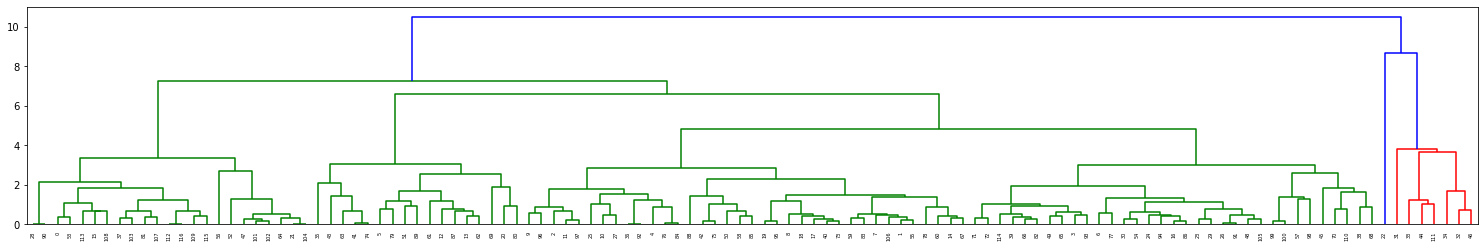

In [25]:
import scipy.cluster.hierarchy
Z = hierarchy.linkage(dist_matrix, 'complete')
plt.figure(figsize=(26, 4))
dendro = hierarchy.dendrogram(Z)

In [26]:
df['manufact'].values

array(['Acura', 'Acura', 'Acura', 'Audi', 'Audi', 'Audi', 'BMW', 'BMW',
       'Buick', 'Buick', 'Buick', 'Buick', 'Cadillac', 'Cadillac',
       'Cadillac', 'Chevrolet', 'Chevrolet', 'Chevrolet', 'Chevrolet',
       'Chevrolet', 'Chevrolet', 'Chevrolet', 'Chevrolet', 'Chrysler',
       'Chrysler', 'Chrysler', 'Chrysler', 'Chrysler', 'Dodge', 'Dodge',
       'Dodge', 'Dodge', 'Dodge', 'Dodge', 'Dodge', 'Dodge', 'Dodge',
       'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford',
       'Ford', 'Ford', 'Honda', 'Honda', 'Honda', 'Honda', 'Honda',
       'Hyundai', 'Hyundai', 'Hyundai', 'Infiniti', 'Jeep', 'Jeep',
       'Jeep', 'Lexus', 'Lexus', 'Lexus', 'Lincoln', 'Lincoln',
       'Mitsubishi', 'Mitsubishi', 'Mitsubishi', 'Mitsubishi',
       'Mitsubishi', 'Mitsubishi', 'Mitsubishi', 'Mercury', 'Mercury',
       'Mercury', 'Mercury', 'Mercury', 'Mercury', 'Mercedes-Benz',
       'Mercedes-Benz', 'Mercedes-Benz', 'Mercedes-Benz', 'Nissan',
       'Nissan', 'Nissan', 'Nissan'

In [27]:
len(df['manufact'].values)

117

In [28]:
df['model'].values

array(['Integra', 'TL', 'RL', 'A4', 'A6', 'A8', '328i', '528i', 'Century',
       'Regal', 'Park Avenue', 'LeSabre', 'DeVille', 'Eldorado', 'Catera',
       'Cavalier', 'Malibu', 'Lumina', 'Monte Carlo', 'Camaro',
       'Corvette', 'Prizm', 'Metro', 'Sebring Coupe', 'Sebring Conv.',
       'Concorde', 'Cirrus', 'LHS', 'Neon', 'Avenger', 'Stratus', 'Viper',
       'Ram Pickup', 'Ram Wagon', 'Ram Van', 'Dakota', 'Caravan',
       'Escort', 'Mustang', 'Contour', 'Taurus', 'Crown Victoria',
       'Explorer', 'Windstar', 'Expedition', 'Ranger', 'F-Series',
       'Civic', 'Accord', 'CR-V', 'Passport', 'Odyssey', 'Accent',
       'Elantra', 'Sonata', 'I30', 'Wrangler', 'Cherokee',
       'Grand Cherokee', 'ES300', 'GS300', 'LS400', 'Continental',
       'Town car', 'Mirage', 'Eclipse', 'Galant', 'Diamante', '3000GT',
       'Montero', 'Montero Sport', 'Mystique', 'Cougar', 'Sable',
       'Grand Marquis', 'Mountaineer', 'Villager', 'C-Class', 'E-Class',
       'S-Class', 'SL-Class', 'Sentr

In [29]:
len(df['model'].values)

117

In [30]:
df["Make"] = df['manufact'] + '_' + df["model"]
df["Make"].values

array(['Acura_Integra', 'Acura_TL', 'Acura_RL', 'Audi_A4', 'Audi_A6',
       'Audi_A8', 'BMW_328i', 'BMW_528i', 'Buick_Century', 'Buick_Regal',
       'Buick_Park Avenue', 'Buick_LeSabre', 'Cadillac_DeVille',
       'Cadillac_Eldorado', 'Cadillac_Catera', 'Chevrolet_Cavalier',
       'Chevrolet_Malibu', 'Chevrolet_Lumina', 'Chevrolet_Monte Carlo',
       'Chevrolet_Camaro', 'Chevrolet_Corvette', 'Chevrolet_Prizm',
       'Chevrolet_Metro', 'Chrysler_Sebring Coupe',
       'Chrysler_Sebring Conv.', 'Chrysler_Concorde', 'Chrysler_Cirrus',
       'Chrysler_LHS', 'Dodge_Neon', 'Dodge_Avenger', 'Dodge_Stratus',
       'Dodge_Viper', 'Dodge_Ram Pickup', 'Dodge_Ram Wagon',
       'Dodge_Ram Van', 'Dodge_Dakota', 'Dodge_Caravan', 'Ford_Escort',
       'Ford_Mustang', 'Ford_Contour', 'Ford_Taurus',
       'Ford_Crown Victoria', 'Ford_Explorer', 'Ford_Windstar',
       'Ford_Expedition', 'Ford_Ranger', 'Ford_F-Series', 'Honda_Civic',
       'Honda_Accord', 'Honda_CR-V', 'Honda_Passport', 'Honda_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


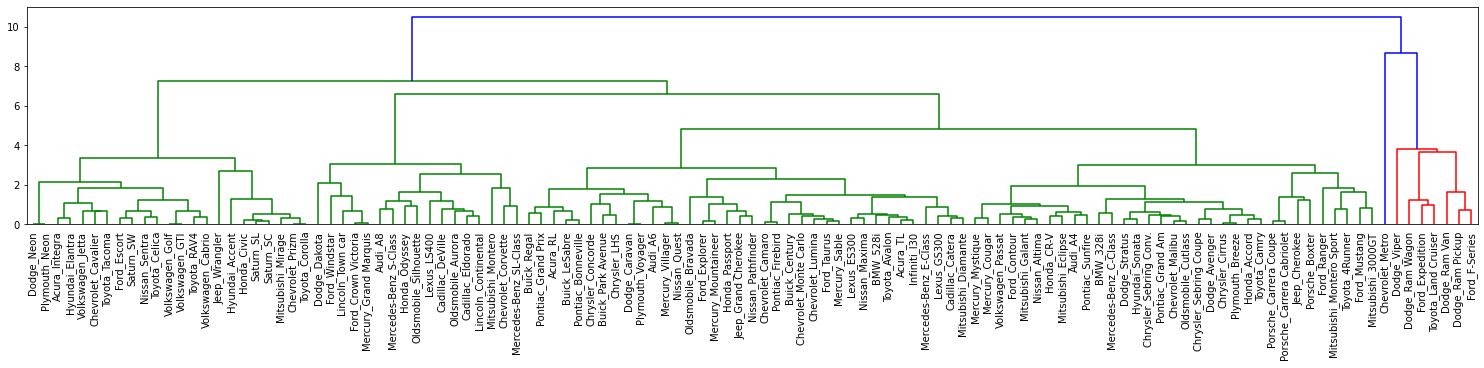

In [31]:
import scipy.cluster.hierarchy
Z = hierarchy.linkage(dist_matrix, 'complete')
plt.figure(figsize=(26, 4))
dendro = hierarchy.dendrogram(Z,  labels=df['Make'].values, leaf_rotation=90, leaf_font_size =10)


**Dendrogram with unscaled data**

In [32]:
from scipy.spatial import distance_matrix 
dist_matrix = distance_matrix(X,X) 
print(dist_matrix.round(1))

[[  0.   87.9  75.8 ...  16.6  28.1  26.8]
 [ 87.9   0.   17.1 ...  75.6 115.3 114.3]
 [ 75.8  17.1   0.  ...  62.2 103.4 102.1]
 ...
 [ 16.6  75.6  62.2 ...   0.   43.4  41.5]
 [ 28.1 115.3 103.4 ...  43.4   0.    3.8]
 [ 26.8 114.3 102.1 ...  41.5   3.8   0. ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


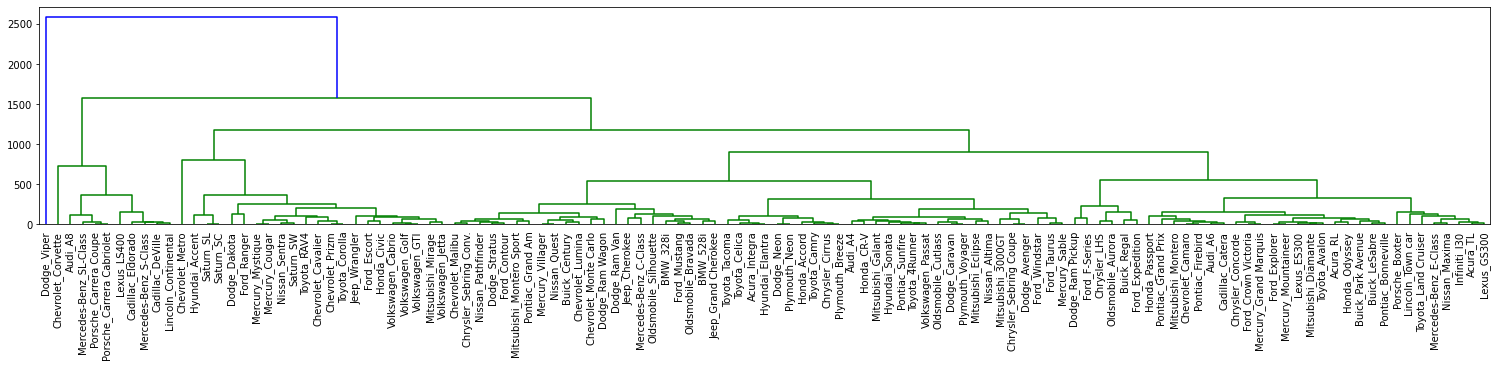

In [33]:
import scipy.cluster.hierarchy
Z = hierarchy.linkage(dist_matrix, 'complete')
plt.figure(figsize=(26, 4))
dendro = hierarchy.dendrogram(Z,  labels=df['Make'].values, leaf_rotation=90, leaf_font_size =10)

### **Clustering using scikit-learn**<a name="Method"></a>

**Using the dendrogram to find the optimal number of clusters**

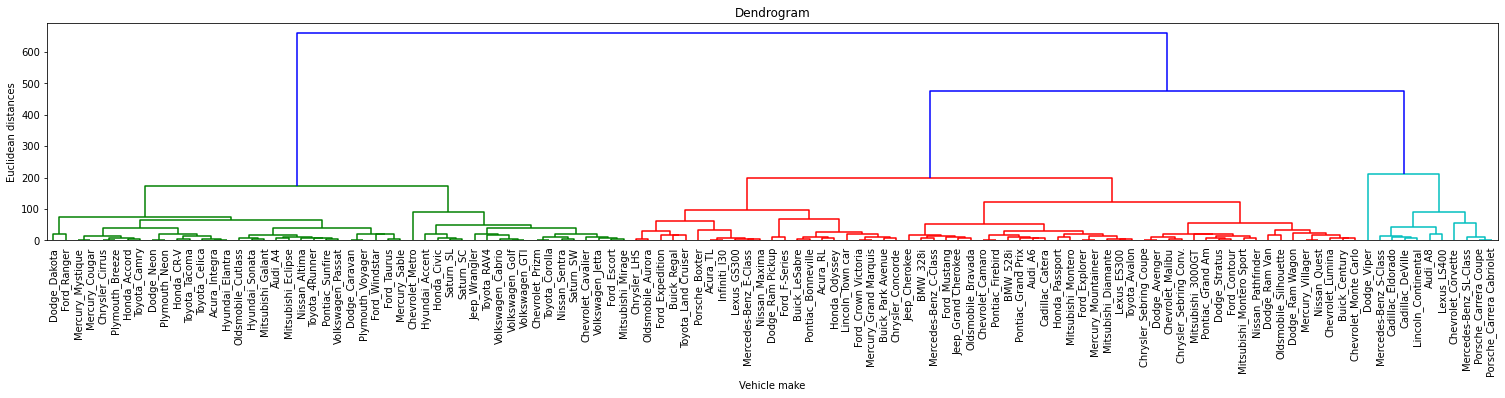

In [34]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(26, 4))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'), labels=df['Make'].values, leaf_rotation=90, leaf_font_size =10)
plt.title('Dendrogram')
plt.xlabel('Vehicle make')
plt.ylabel('Euclidean distances')
plt.show()

**Training the Hierarchical Clustering model on the dataset**

Use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

- Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
- Average linkage minimizes the average of the distances between all observations of pairs of clusters.

In [35]:
A = X.iloc[:, [3,5]].values
A[0:5]

array([[67.3  ,  2.639],
       [70.3  ,  3.517],
       [71.4  ,  3.85 ],
       [68.2  ,  2.998],
       [76.1  ,  3.561]], dtype=float32)

In [36]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(A)

### **Cluster Visualization**<a name="Visualize"></a>

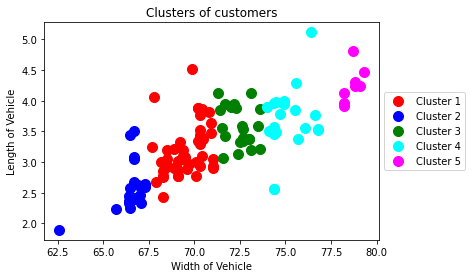

In [37]:
#Visualising the clusters
plt.scatter(A[y_hc == 0, 0], A[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(A[y_hc == 1, 0], A[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(A[y_hc == 2, 0], A[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(A[y_hc == 3, 0], A[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(A[y_hc == 4, 0], A[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Width of Vehicle')
plt.ylabel('Length of Vehicle')
plt.legend(bbox_to_anchor=(1.0, 0.5), loc = 'center left')
plt.show()

In [38]:
B = X.iloc[:, [0,1]].values
B[0:5]

array([[  1.8, 140. ],
       [  3.2, 225. ],
       [  3.5, 210. ],
       [  1.8, 150. ],
       [  2.8, 200. ]], dtype=float32)

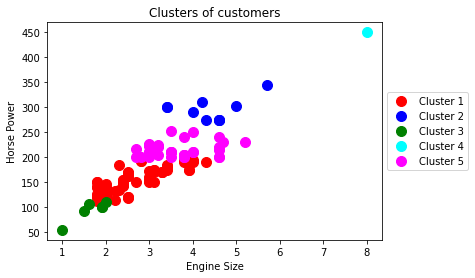

In [39]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(B)
#Visualising the clusters
plt.scatter(B[y_hc == 0, 0], B[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(B[y_hc == 1, 0], B[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(B[y_hc == 2, 0], B[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(B[y_hc == 3, 0], B[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(B[y_hc == 4, 0], B[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Engine Size')
plt.ylabel('Horse Power')
plt.legend(bbox_to_anchor=(1.0, 0.5), loc = 'center left')
plt.show()

In [40]:
hc.labels_

array([0, 4, 4, 0, 4, 1, 0, 0, 0, 4, 4, 4, 1, 1, 4, 0, 0, 0, 0, 4, 1, 0,
       2, 0, 0, 4, 0, 4, 0, 0, 0, 3, 4, 0, 0, 0, 0, 2, 0, 0, 0, 4, 4, 0,
       4, 0, 4, 2, 0, 0, 4, 4, 2, 0, 0, 4, 0, 0, 0, 4, 4, 1, 1, 4, 0, 0,
       0, 4, 0, 4, 0, 0, 0, 0, 4, 4, 0, 0, 4, 1, 1, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 1, 1, 2, 2, 0, 0, 0, 4, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0])

Add a new field to the original dataframe to show the cluster of each row:

In [41]:
df['cluster_'] = hc.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,Make,cluster_
0,Acura,Integra,16.919001,16.360001,0.0,21.500000,1.8,140.0,101.199997,67.300003,172.399994,2.639,13.200000,28.0,2.828,0.0,Acura_Integra,0
1,Acura,TL,39.383999,19.875000,0.0,28.400000,3.2,225.0,108.099998,70.300003,192.899994,3.517,17.200001,25.0,3.673,0.0,Acura_TL,4
3,Acura,RL,8.588000,29.725000,0.0,42.000000,3.5,210.0,114.599998,71.400002,196.600006,3.850,18.000000,22.0,2.150,0.0,Acura_RL,4
4,Audi,A4,20.396999,22.254999,0.0,23.990000,1.8,150.0,102.599998,68.199997,178.000000,2.998,16.400000,27.0,3.015,0.0,Audi_A4,0
5,Audi,A6,18.780001,23.555000,0.0,33.950001,2.8,200.0,108.699997,76.099998,192.000000,3.561,18.500000,22.0,2.933,0.0,Audi_A6,4


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mpg')

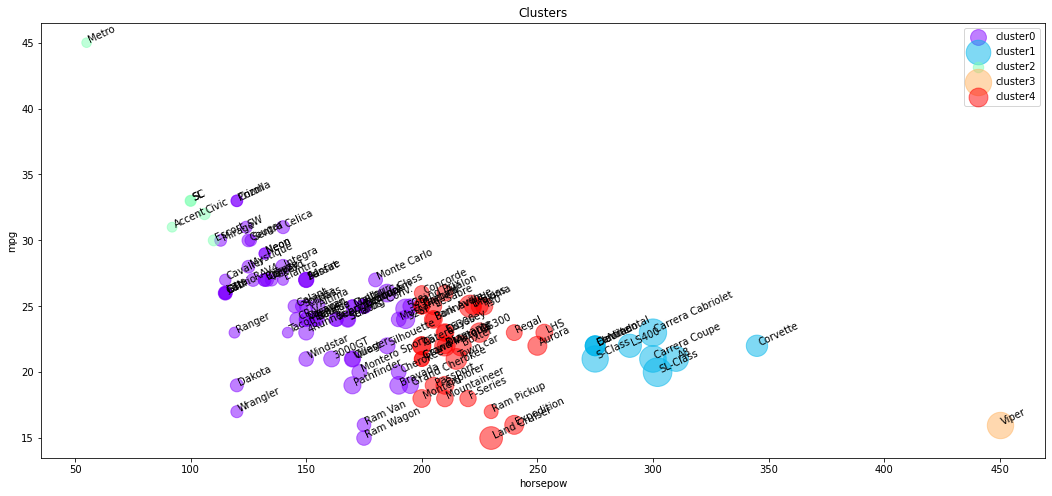

In [42]:
import matplotlib.cm as cm
n_clusters = max(hc.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(18,8))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
#plt.savefig("agglom.png")

As can be seen above, the distribution of each cluster using the scatter plot is visible, but it is not very clear where is the centroid of each cluster. Moreover, there are 2 types of vehicles in the dataset, "truck" (value of 1 in the type column) and "car" (value of 0 in the type column). So, use them to distinguish the classes, and summarize the cluster. 

In [43]:
df[df['type'] == 0.0].head(10)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,Make,cluster_
0,Acura,Integra,16.919001,16.360001,0.0,21.500000,1.8,140.0,101.199997,67.300003,172.399994,2.639,13.200000,28.000000,2.828,0.0,Acura_Integra,0
1,Acura,TL,39.383999,19.875000,0.0,28.400000,3.2,225.0,108.099998,70.300003,192.899994,3.517,17.200001,25.000000,3.673,0.0,Acura_TL,4
3,Acura,RL,8.588000,29.725000,0.0,42.000000,3.5,210.0,114.599998,71.400002,196.600006,3.850,18.000000,22.000000,2.150,0.0,Acura_RL,4
4,Audi,A4,20.396999,22.254999,0.0,23.990000,1.8,150.0,102.599998,68.199997,178.000000,2.998,16.400000,27.000000,3.015,0.0,Audi_A4,0
5,Audi,A6,18.780001,23.555000,0.0,33.950001,2.8,200.0,108.699997,76.099998,192.000000,3.561,18.500000,22.000000,2.933,0.0,Audi_A6,4
6,Audi,A8,1.380000,39.000000,0.0,62.000000,4.2,310.0,113.000000,74.000000,198.199997,3.902,23.700001,21.000000,0.322,0.0,Audi_A8,1
8,BMW,328i,9.231000,28.674999,0.0,33.400002,2.8,193.0,107.300003,68.500000,176.000000,3.197,16.600000,24.000000,2.223,0.0,BMW_328i,0
9,BMW,528i,17.527000,36.125000,0.0,38.900002,2.8,193.0,111.400002,70.900002,188.000000,3.472,18.500000,24.799999,2.864,0.0,BMW_528i,0
10,Buick,Century,91.560997,12.475000,0.0,21.975000,3.1,175.0,109.000000,72.699997,194.600006,3.368,17.500000,25.000000,4.517,0.0,Buick_Century,0
11,Buick,Regal,39.349998,13.740000,0.0,25.299999,3.8,240.0,109.000000,72.699997,196.199997,3.543,17.500000,23.000000,3.672,0.0,Buick_Regal,4


In [44]:
df[df['type'] == 1.0].head(10)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,Make,cluster_
40,Dodge,Ram Pickup,227.061005,15.060000,1.0,19.459999,5.2,230.0,138.699997,79.300003,224.199997,4.470,26.0,17.0,5.425,0.0,Dodge_Ram Pickup,4
41,Dodge,Ram Wagon,16.767000,15.510000,1.0,21.315001,3.9,175.0,109.599998,78.800003,192.600006,4.245,32.0,15.0,2.819,0.0,Dodge_Ram Wagon,0
42,Dodge,Ram Van,31.038000,13.425000,1.0,18.575001,3.9,175.0,127.199997,78.800003,208.500000,4.298,32.0,16.0,3.435,0.0,Dodge_Ram Van,0
43,Dodge,Dakota,111.313004,11.260000,1.0,16.980000,2.5,120.0,131.000000,71.500000,215.000000,3.557,22.0,19.0,4.712,0.0,Dodge_Dakota,0
45,Dodge,Caravan,181.748993,12.025000,1.0,19.565001,2.4,150.0,113.300003,76.800003,186.300003,3.533,20.0,24.0,5.203,0.0,Dodge_Caravan,0
52,Ford,Explorer,276.747009,16.639999,1.0,31.930000,4.0,210.0,111.599998,70.199997,190.699997,3.876,21.0,19.0,5.623,0.0,Ford_Explorer,4
53,Ford,Windstar,155.787003,13.175000,1.0,21.410000,3.0,150.0,120.699997,76.599998,200.899994,3.761,26.0,21.0,5.048,0.0,Ford_Windstar,0
54,Ford,Expedition,125.337997,23.575001,1.0,36.134998,4.6,240.0,119.000000,78.699997,204.600006,4.808,26.0,16.0,4.831,0.0,Ford_Expedition,4
55,Ford,Ranger,220.649994,7.850000,1.0,12.050000,2.5,119.0,117.500000,69.400002,200.699997,3.086,20.0,23.0,5.397,0.0,Ford_Ranger,0
56,Ford,F-Series,540.560974,15.075000,1.0,26.934999,4.6,220.0,138.500000,79.099998,224.500000,4.241,25.1,18.0,6.293,0.0,Ford_F-Series,4


First count the number of cases in each group:

In [45]:
df.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     47
          1.0     20
1         0.0     10
2         0.0      6
3         0.0      1
4         0.0     24
          1.0      9
Name: cluster_, dtype: int64

Now look at the characteristics of each cluster:

In [46]:
agg_vehicles = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_vehicles

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   148.468079  2.408511  26.463829  18.902000
         1.0   158.350006  3.040000  20.850000  21.032600
1        0.0   294.700012  4.380000  21.600000  57.863998
2        0.0    93.833336  1.650000  34.000000  11.184834
3        0.0   450.000000  8.000000  16.000000  69.724998
4        0.0   214.583328  3.487500  23.416666  30.656458
         1.0   217.222229  4.144444  18.111111  30.906111

It is obvious that we have 3 main clusters with the majority of vehicles in those.

__Cars__:
- Cluster 0: with almost high mpg, and lower than average in horsepower and in price.
- Cluster 4: with average mpg, and average in horsepower and also in price
- Cluster 1: with almost good mpg, and average in horsepower. Also higher in price
- Cluster 2: with almost high mpg and low in horsepower, also lowest in price.

    
__Trucks__:
- Cluster 0: with average mpg, and lower than average in horsepower and price.
- Cluster 4: with almost low mpg and medium horsepower, also average price 


Please notice that  __type__ , and __price__ of vehicles were not used in the clustering process, but Hierarchical clustering could forge the clusters and discriminate them with quite high accuracy.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mpg')

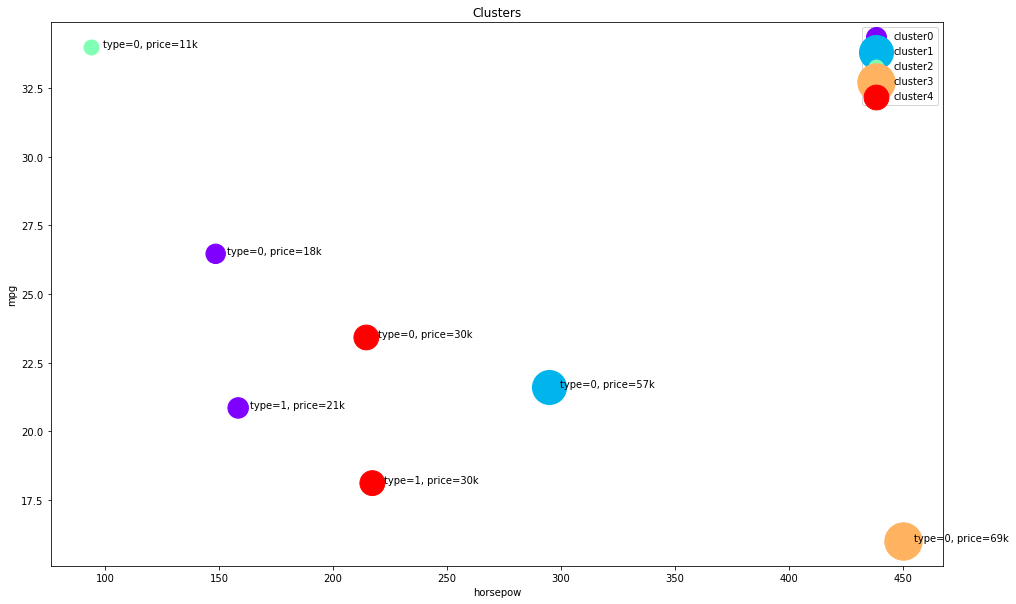

In [47]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_vehicles.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
#plt.savefig("cluster.png")

## **Clustering on Water Treatment dataset**<a name="Clustering"></a>

In [48]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


Attribute Information:

All atrributes are numeric and continuous

N. Attrib.
1. Q-E (input flow to plant)
2. ZN-E (input Zinc to plant)
3. PH-E (input pH to plant)
4. DBO-E (input Biological demand of oxygen to plant)
5. DQO-E (input chemical demand of oxygen to plant)
6. SS-E (input suspended solids to plant)
7. SSV-E (iAnput volatile supended solids to plant)
8. SED-E (input sediments to plant)
9. COND-E (input conductivity to plant)
10. PH-P (input pH to primary settler)
11. DBO-P (input Biological demand of oxygen to primary settler)
12. SS-P (input suspended solids to primary settler)
13. SSV-P (input volatile supended solids to primary settler)
14. SED-P (input sediments to primary settler)
15. COND-P (input conductivity to primary settler)
16. PH-D (input pH to secondary settler)
17. DBO-D (input Biological demand of oxygen to secondary settler)
18. DQO-D (input chemical demand of oxygen to secondary settler)
19. SS-D (input suspended solids to secondary settler)
20. SSV-D (input volatile supended solids to secondary settler)
21. SED-D (input sediments to secondary settler)
22. COND-D (input conductivity to secondary settler)
23. PH-S (output pH)
24. DBO-S (output Biological demand of oxygen)
25. DQO-S (output chemical demand of oxygen)
26. SS-S (output suspended solids)
27. SSV-S (output volatile supended solids)
28. SED-S (output sediments)
29. COND-S (output conductivity)
30. RD-DBO-P (performance input Biological demand of oxygen in primary settler)
31. RD-SS-P (performance input suspended solids to primary settler)
32. RD-SED-P (performance input sediments to primary settler)
33. RD-DBO-S (performance input Biological demand of oxygen to secondary settler)
34. RD-DQO-S (performance input chemical demand of oxygen to secondary settler)
35. RD-DBO-G (global performance input Biological demand of oxygen)
36. RD-DQO-G (global performance input chemical demand of oxygen)
37. RD-SS-G (global performance input suspended solids)
38. RD-SED-G (global performance input sediments)



<b>Columns:</b>

'Q_E', 'ZN_E', 'PH_E', 'DBO_E', 'DQO_E', 'SS_E', 'SSV_E', 'SED_E', 'COND_E', 'PH_P', 'DBO_P', 'SS_P', 'SSV_P', 'SED_P', 'COND_P', 'PH_D', 'DBO_D', 'DQO_D', 'SS_D', 'SSV_D', 'SED_D', 'COND_D', 'PH_S', 'DBO_S', 'DQO_S', 'SS_S', 'SSV_S', 'SED_S', 'COND_S', 'RD_DBO_P', 'RD_SS_P', 'RD_SED_P', 'RD_DBO_S', 'RD_DQO_S', 'RD_DB_G', 'RD_DQO_G', 'RD_SS_G', 'RD_SED_G'

In [49]:
df.columns = ['Date','Q_E', 'ZN_E', 'PH_E', 'DBO_E', 'DQO_E', 'SS_E', 'SSV_E', 'SED_E', 'COND_E', 'PH_P', 'DBO_P', 'SS_P', 'SSV_P', 'SED_P', 'COND_P', 'PH_D', 'DBO_D', 'DQO_D', 'SS_D', 'SSV_D', 'SED_D', 'COND_D', 'PH_S', 'DBO_S', 'DQO_S', 'SS_S', 'SSV_S', 'SED_S', 'COND_S', 'RD_DBO_P', 'RD_SS_P', 'RD_SED_P', 'RD_DBO_S', 'RD_DQO_S', 'RD_DB_G', 'RD_DQO_G', 'RD_SS_G', 'RD_SED_G']

In [50]:
df.head()

,Date,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DB_G,RD_DQO_G,RD_SS_G,RD_SED_G
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


In [51]:
df.shape

(527, 39)

In [52]:
df = df.iloc[ : , :10]

In [53]:
df.replace('?', np.NaN, inplace=True)

In [54]:
df.isnull().sum()

Date       0
Q_E       18
ZN_E       3
PH_E       0
DBO_E     23
DQO_E      6
SS_E       1
SSV_E     11
SED_E     25
COND_E     0
dtype: int64

In [55]:
df = df.dropna()

In [56]:
df.shape

(443, 10)

In [57]:
df['timeStamp'] = df['Date'].apply(lambda x: x.split('-')[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [59]:
df['timeStamp'].head()

3   1990-05-03
4   1990-06-03
5   1990-07-03
7   1990-09-03
8   1990-11-03
Name: timeStamp, dtype: datetime64[ns]

In [60]:
df['Month'] = df['timeStamp'].apply(lambda x:x.month)
df['Month'].tail()

520    8
522    8
523    8
524    8
525    8
Name: Month, dtype: int64

In [61]:
df['Year'] = df['timeStamp'].apply(lambda x:x.year)
df['Year'].tail()

520    1991
522    1991
523    1991
524    1991
525    1991
Name: Year, dtype: int64

In [62]:
df['Months'] = df['Month'].astype('string') + '/' + df['Year'].astype('string')
df['Months']

3       5/1990
4       6/1990
5       7/1990
7       9/1990
8      11/1990
        ...   
520     8/1991
522     8/1991
523     8/1991
524     8/1991
525     8/1991
Name: Months, Length: 443, dtype: string

In [63]:
df.head()

,Date,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,timeStamp,Month,Year,Months
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,1990-05-03,5,1990,5/1990
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,1990-06-03,6,1990,6/1990
5,D-7/3/90,38572,3.00,7.8,202,372,186,68.8,4.5,1644,1990-07-03,7,1990,7/1990
7,D-9/3/90,36107,5.00,7.7,215,489,334,40.7,6.0,1613,1990-09-03,9,1990,9/1990
8,D-11/3/90,29156,2.50,7.7,206,451,194,69.1,4.5,1249,1990-11-03,11,1990,11/1990


In [64]:
X = df.drop(['Date', 'timeStamp', 'Month', 'Year', 'Months'],  axis = 1)
X.columns = ['Q', 'ZN', 'PH', 'DBO','DQO', 'SS','SSV', 'SED', 'COND']
X

,Q,ZN,PH,DBO,DQO,SS,SSV,SED,COND
3,35023,3.50,7.9,205,588,192,65.6,4.5,2430
4,36924,1.50,8.0,242,496,176,64.8,4.0,2110
5,38572,3.00,7.8,202,372,186,68.8,4.5,1644
7,36107,5.00,7.7,215,489,334,40.7,6.0,1613
8,29156,2.50,7.7,206,451,194,69.1,4.5,1249
...,...,...,...,...,...,...,...,...,...
520,27838,0.13,7.6,179,265,128,71.9,1.8,992
522,32723,0.16,7.7,93,252,176,56.8,2.3,894
523,33535,0.32,7.8,192,346,172,68.6,4.0,988
524,32922,0.30,7.4,139,367,180,64.4,3.0,1060


In [65]:
X.shape

(443, 9)

In [66]:
from sklearn.preprocessing import MinMaxScaler
#x = X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled [0:5]


array([[0.49915053, 0.10179641, 0.42857143, 0.42751843, 0.58953488,
        0.08318584, 0.73184358, 0.11516854, 0.68980225],
       [0.53714697, 0.04191617, 0.5       , 0.51842752, 0.48255814,
        0.06902655, 0.72067039, 0.1011236 , 0.56572315],
       [0.57008655, 0.08682635, 0.35714286, 0.42014742, 0.33837209,
        0.07787611, 0.77653631, 0.11516854, 0.38503296],
       [0.52081709, 0.14670659, 0.28571429, 0.45208845, 0.4744186 ,
        0.20884956, 0.38407821, 0.15730337, 0.3730128 ],
       [0.38188323, 0.07185629, 0.28571429, 0.42997543, 0.43023256,
        0.08495575, 0.78072626, 0.11516854, 0.23187282]])

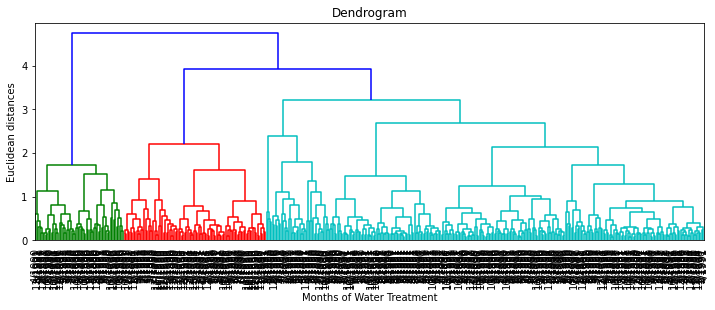

In [67]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12, 4))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = 'ward'), labels=df['Months'].values, leaf_rotation=90, leaf_font_size =10)
plt.title('Dendrogram')
plt.xlabel('Months of Water Treatment')
plt.ylabel('Euclidean distances')
plt.show()

In [68]:
X.columns

Index(['Q', 'ZN', 'PH', 'DBO', 'DQO', 'SS', 'SSV', 'SED', 'COND'], dtype='object')

As can be seen from the figure, the dendrogram is not very clear. To make it more readable declutter the data by counting the the number of inputs into each months group, instead of dates:

In [69]:
Z = df[['Q_E', 'ZN_E', 'PH_E', 'DBO_E', 'DQO_E', 'SS_E', 'SSV_E', 'SED_E', 'COND_E', 'Months']]
Z = Z.groupby(['Months'])['Q_E', 'ZN_E', 'PH_E', 'DBO_E', 'DQO_E', 'SS_E', 'SSV_E', 'SED_E', 'COND_E'].mean()
Z.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,PH_E,COND_E
Months,,
1/1990,7.763636,1410.636364
1/1991,7.958333,1476.333333
10/1990,8.047368,1441.157895
10/1991,7.788889,1458.111111
11/1990,8.058333,1758.083333


In [70]:
from sklearn.preprocessing import MinMaxScaler
#x = X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
Z_scaled = min_max_scaler.fit_transform(Z)
Z_scaled [0:5]

array([[0.37843747, 0.50792356],
       [0.78908418, 0.60096778],
       [0.97687327, 0.55115009],
       [0.43169904, 0.57516031],
       [1.        , 1.        ]])

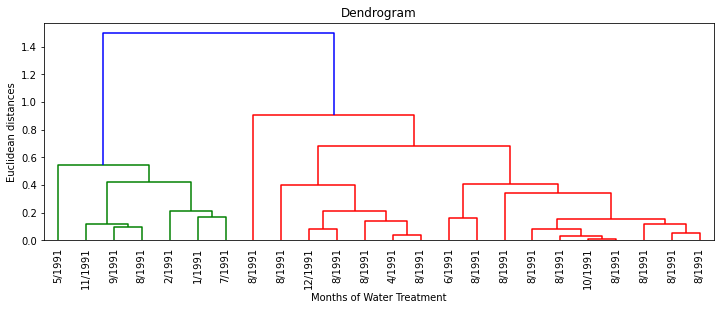

In [71]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12, 4))
dendrogram = sch.dendrogram(sch.linkage(Z_scaled, method = 'ward'), labels=df['Months'].values, leaf_rotation=90, leaf_font_size =10)
plt.title('Dendrogram')
plt.xlabel('Months of Water Treatment')
plt.ylabel('Euclidean distances')
plt.show()

In [72]:
A = X_scaled[:, [2,-1]]
A[0:5]

array([[0.42857143, 0.68980225],
       [0.5       , 0.56572315],
       [0.35714286, 0.38503296],
       [0.28571429, 0.3730128 ],
       [0.28571429, 0.23187282]])

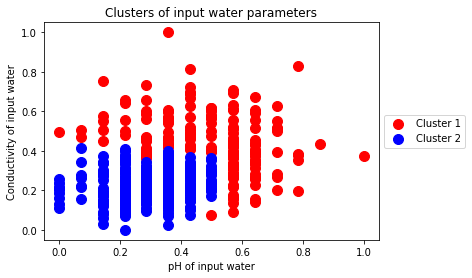

In [73]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(A)
#Visualising the clusters
plt.scatter(A[y_hc == 0, 0], A[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(A[y_hc == 1, 0], A[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(A[y_hc == 2, 0], A[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(A[y_hc == 3, 0], A[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(A[y_hc == 4, 0], A[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of input water parameters')
plt.xlabel('pH of input water')
plt.ylabel('Conductivity of input water')
plt.legend(bbox_to_anchor=(1.0, 0.5), loc = 'center left')
plt.show()

In [74]:
hc.labels_

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [75]:
df['cluster_'] = hc.labels_
df.head()

,Date,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,timeStamp,Month,Year,Months,cluster_
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,1990-05-03,5,1990,5/1990,0
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,1990-06-03,6,1990,6/1990,0
5,D-7/3/90,38572,3.00,7.8,202,372,186,68.8,4.5,1644,1990-07-03,7,1990,7/1990,1
7,D-9/3/90,36107,5.00,7.7,215,489,334,40.7,6.0,1613,1990-09-03,9,1990,9/1990,0
8,D-11/3/90,29156,2.50,7.7,206,451,194,69.1,4.5,1249,1990-11-03,11,1990,11/1990,1


In [76]:
df[['DBO_E','DQO_E', 'Q_E','SSV_E']] = df[['DBO_E','DQO_E', 'Q_E','SSV_E']].astype('float')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'mpg')

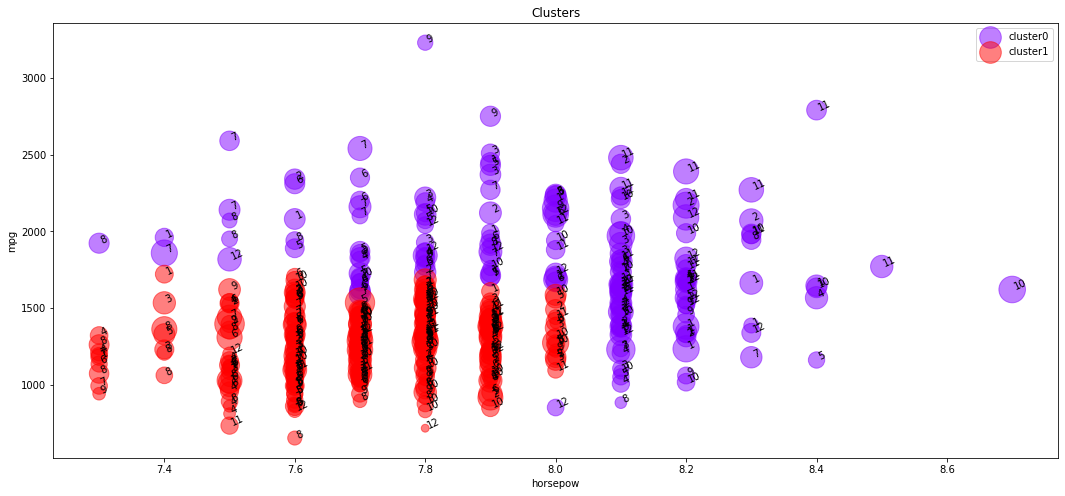

In [77]:
import matplotlib.cm as cm
n_clusters = max(hc.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(18,8))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.PH_E[i], subset.COND_E[i],str(subset['Month'][i]), rotation=25) 
    plt.scatter(subset.PH_E, subset.COND_E, s= subset.DBO_E*2, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
#plt.savefig("agglom.png")

In [78]:
agg_water = df.groupby(['cluster_','Month'])['PH_E', 'COND_E',	'DBO_E','DQO_E', 'Q_E','SSV_E'].mean()
agg_water

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


PH_E       COND_E       DBO_E       DQO_E           Q_E  \
cluster_ Month                                                                
0        1      8.068182  1641.318182  218.181818  452.090909  38677.954545   
         2      8.066667  1806.200000  225.333333  527.866667  33107.866667   
         3      7.966667  1962.083333  185.833333  426.250000  39228.000000   
         4      7.992308  1660.307692  196.923077  443.461538  35450.538462   
         5      7.941667  1699.500000  174.666667  420.500000  40601.750000   
         6      7.866667  1949.333333  197.916667  439.916667  36340.000000   
         7      7.800000  1887.666667  230.400000  484.266667  34722.933333   
         8      7.787500  1778.500000  152.250000  323.500000  38517.875000   
         9      7.930000  1922.100000  181.100000  440.100000  40467.100000   
         10     8.120000  1723.666667  196.600000  373.200000  42000.000000   
         11     8.182353  2000.941176  215.470588  449.000000  35944.588235   
         12     8.037500  1716.875000  215.125000  433.687500  36349.312500   
1        1      7.679167  1264.875000  194.791667  392.791667  36532.291667   
         2      7.778947  1304.736842  180.210526  376.105263  37274.578947   
         3      7.736667  1373.400000  188.400000  404.800000  38162.366667   
         4      7.662069  1221.862069  188.310345  379.482759  35926.551724   
         5      7.784848  1232.424242  201.575758  409.424242  38809.212121   
         6      7.703030  1339.030303  193.030303  396.757576  36154.030303   
         7      7.600000  1329.800000  183.800000  401.400000  33777.333333   
         8      7.614286  1071.500000  143.607143  344.428571  34195.857143   
         9      7.722727  1262.454545  180.136364  405.454545  39950.409091   
         10     7.786364  1262.409091  173.500000  389.590909  37436.818182   
         11     7.791667  1258.166667  172.083333  343.250000  35859.916667   
         12     7.777778  1203.444444  155.333333  320.666667  37295.444444   

                    SSV_E  
cluster_ Month             
0        1      69.695455  
         2      69.293333  
         3      62.658333  
         4      67.469231  
         5      53.666667  
         6      68.291667  
         7      54.793333  
         8      57.462500  
         9      52.400000  
         10     55.373333  
         11     68.647059  
         12     67.143750  
1        1      64.537500  
         2      63.531579  
         3      58.846667  
         4      59.813793  
         5      56.366667  
         6      58.048485  
         7      59.073333  
         8      61.300000  
         9      54.972727  
         10     59.995455  
         11     58.033333  
         12     60.044444

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Conductivity of input water')

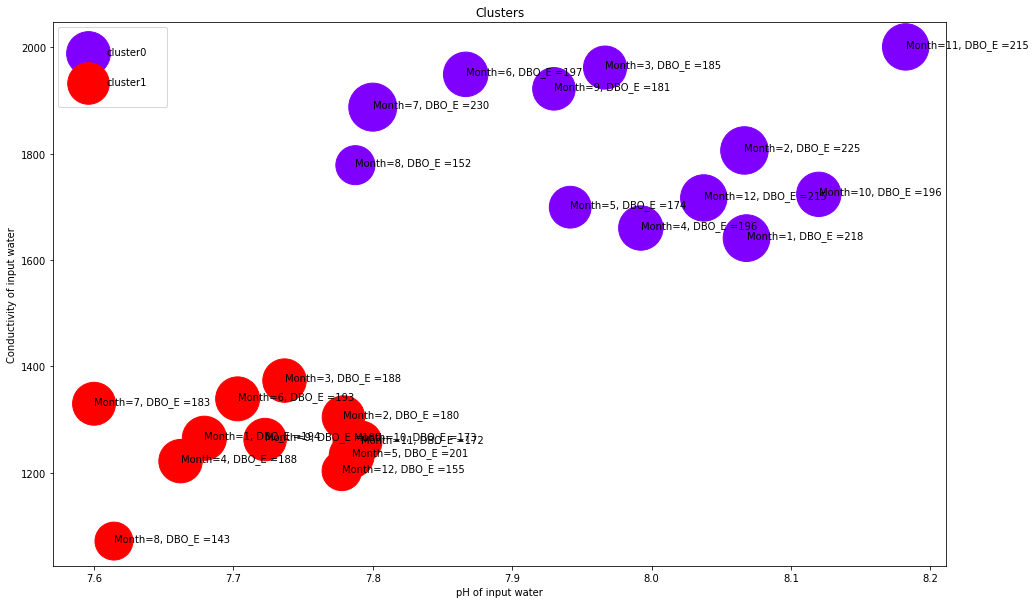

In [79]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_water.loc[(label,),]
    for i in subset.index:
      plt.text(subset.loc[i][0], subset.loc[i][1], 'Month='+str(int(i))+ ', DBO_E ='+str(int(subset.loc[i][2])))
    plt.scatter(subset.PH_E, subset.COND_E, s=subset.DBO_E*10, c=color, label='cluster'+str(label))
plt.legend(borderpad=2, labelspacing = 2)
plt.title('Clusters')
plt.xlabel('pH of input water')
plt.ylabel('Conductivity of input water')
#plt.savefig("cluster.png")

As can be seen from the figure, there are two clusters of incoming water:
<li>Cluster 1 with with pH and low conductivity.
<li>Cluster 2 with high pH and high conductivity. 